# 3. Machine Learning for Classification
Logistic Regression for Churn Prediction

## 3.1 Churn Prediction Project
- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Data preparation
- Read data with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df['totalcharges'].iloc[488]

'_'

In [10]:
# replace values that throw an error with nan
df['totalcharges'] = pd.to_numeric(df["totalcharges"],errors="coerce")

In [11]:
# fill nan with 0 
df['totalcharges'] = df['totalcharges'].fillna(0)

In [12]:
df['monthlycharges'] = pd.to_numeric(df["monthlycharges"])

In [13]:
df["churn"] = df["churn"].map({"yes": 1, "no": 0})

## 3.2 Setting up the validation framework
- Perform train-test-split via Scikit-Learn

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25% is 20% of 80% (train_val)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [17]:
y_train = df_train['churn'].to_numpy()
y_val = df_val['churn'].to_numpy()
y_test = df_test['churn'].to_numpy()

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA
- check missing values
- Look at target variable churn
- Look at numerical and categorical variables

In [19]:
# missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

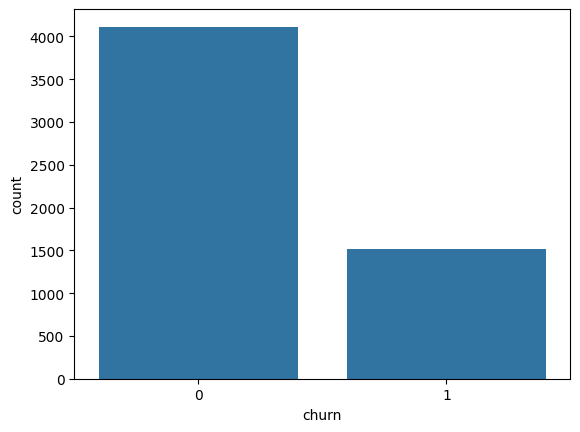

In [20]:
# distribution of target variable churn
sns.countplot(x='churn', data=df_full_train)
plt.show()

In [21]:
# normalize=True calculates the proportion of each class to the total number of observations
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [22]:
# churn rate is the mean of the churn column (0 or 1) - returns fraction of 1s
global_churn = round(df_full_train['churn'].mean(), 2)
global_churn

np.float64(0.27)

In [23]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
# numerical variables = tenure, monthlycharges,totalcharges
numerical = ['tenure','monthlycharges','totalcharges']

In [26]:
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod'
]

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis - identifying which features are most important for churning
- Churn rate
- Risk ratio
- Mutual information - later

#### Churn Rate

within different groups

In [28]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


<Axes: xlabel='gender'>

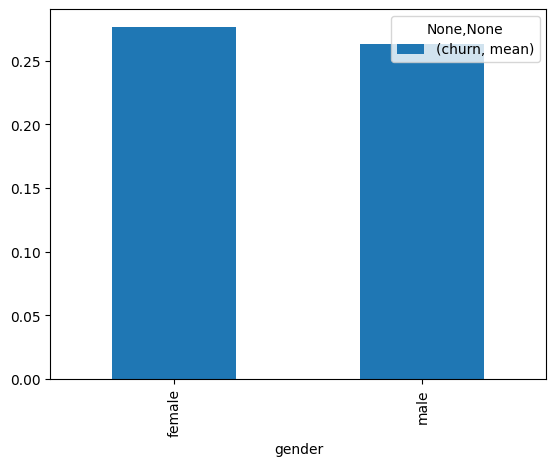

In [29]:
# churn rate by gender - little difference between male and female and from global
df_full_train.groupby('gender').agg({'churn':['mean']})
# plot churn rate by gender 
df_full_train.groupby('gender').agg({'churn':['mean']}).plot(kind='bar')

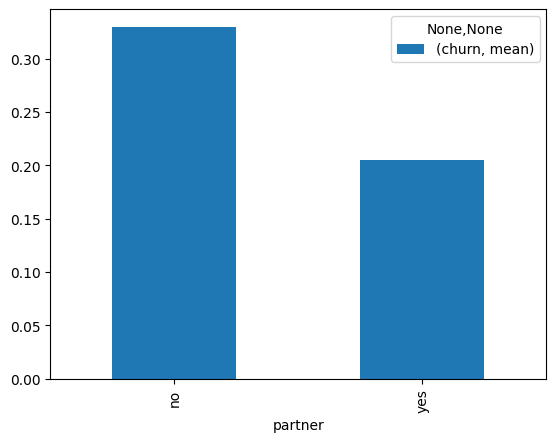

In [30]:
# churn rate by partner status - big difference to global churn, this can be an indicator
# for feature importance
df_full_train.groupby('partner').agg({'churn':['mean']})
# plot churn rate by partner status
df_full_train.groupby('partner').agg({'churn':['mean']}).plot(kind='bar')
plt.show()

### Risk ratio


In [31]:
churn_male = df_full_train[df_full_train['gender'] == 'male']['churn'].mean()
churn_male/global_churn

np.float64(0.9748649283533003)

In [32]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes']['churn'].mean()
churn_partner/global_churn

np.float64(0.7593826246675986)

In [33]:
from IPython.display import display

In [34]:
# the higher the risk, the more likely the customer will churn
for c in categorical:
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/global_churn
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


### 3.6 Feature Importance: Mutual Information
Concept from information theory - tells us how much we can learn bout one variable if we know the value of another

In [35]:
from sklearn.metrics import mutual_info_score

In [36]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [37]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [38]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [39]:
scores = {}
for c in categorical:
    scores[c] = mutual_info_score(df_full_train['churn'], df_full_train[c])

# sort dictionary by value
sorted(scores.items(), key=lambda x: x[1], reverse=True)

[('contract', 0.0983203874041556),
 ('onlinesecurity', 0.06308524972985574),
 ('techsupport', 0.06103245991777444),
 ('internetservice', 0.055867945893496467),
 ('onlinebackup', 0.0469234640537918),
 ('deviceprotection', 0.04345286925268559),
 ('paymentmethod', 0.043210027531582915),
 ('streamingtv', 0.03185333110086085),
 ('streamingmovies', 0.03158089669519908),
 ('paperlessbilling', 0.01758882715925275),
 ('dependents', 0.012345815445534689),
 ('partner', 0.009967689095399745),
 ('seniorcitizen', 0.009410216144208144),
 ('multiplelines', 0.0008574478744731856),
 ('phoneservice', 0.00022871269738296285),
 ('gender', 0.0001174846211139946)]

In [40]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [41]:
df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Feature Importance: Correlation
The closer to abs(1) the correlation, the higher the correlation. The closer to 1, the more important the feature.

In [42]:
# the higher tenure (how long a customer is with the company), the less likely the customer will churn
# the more people have paid in total (totalcharges), the less likely they are to leave as well
# the higher the monthly charge, the less likely they are to leave as well
df_full_train[numerical].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [43]:
# look at churn rate of people who've only been with the company for max. 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [44]:
# look at churn rate of people who've only been with the company for more than 2 months and less
# than a year
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [45]:
# look at churn rate of people who've only been with the company for more than a year
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [46]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [47]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [48]:
# look at churn rate of people who've only been with the company for more than a year
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-Hot Encoding
- using scikit-learn to encode categorical features

In [50]:
# uses one-hot encoding to encode categorical features
from sklearn.feature_extraction import DictVectorizer

In [55]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [70]:
dicts = df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [72]:
# DictVectorizer infers the columns from the data
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [73]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [75]:
# columns represent the feature names shown above- DictVectorizer recognises numerical features
# and leaves them as-is
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [83]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [84]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [87]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# use the same Vectorizer to transform the validation data - do not fit again!
X_val = dv.transform(val_dicts)

## 3.9 Logistic Regression
- Binary classification
- linear vs. logistic regression - logistic is also a linear model, the only difference is that the sigmoid function is applied to the output of the linear regression

In [95]:
# the sigmoid function is the inverse of the logit function - returns the probability of a given value
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [92]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

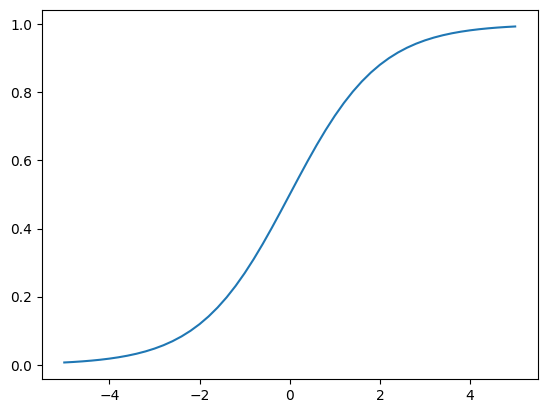

In [94]:
plt.plot(z, sigmoid(z))

### 3.10 Training logistic regression with Scikit-Learn
- train the model
- apply the model to the validation dataset
- calculate the accuracy

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/juliastache/Desktop/Courses/ml-zoomcamp/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
model.intercept_

array([-0.10895755])

In [99]:
# model weights 
model.coef_

array([[ 4.74956328e-01, -1.74848755e-01, -4.07708908e-01,
        -2.97214038e-02, -7.78799314e-02,  6.26225791e-02,
        -8.88686262e-02, -8.13552881e-02, -3.42736216e-02,
        -7.33277136e-02, -3.35234378e-01,  3.16501669e-01,
        -8.88686262e-02,  3.67724892e-03, -2.58001837e-01,
         1.41512924e-01,  8.88757840e-03,  6.24791895e-02,
        -8.88686262e-02, -8.12118986e-02,  2.65502397e-01,
        -8.88686262e-02, -2.84235106e-01, -2.31021755e-01,
         1.23420420e-01, -1.66020398e-01,  5.84190631e-02,
        -8.70019526e-02, -3.20229343e-02,  7.03235012e-02,
        -5.88999495e-02,  1.41512924e-01, -2.49114259e-01,
         2.15465831e-01, -1.20418676e-01, -8.88686262e-02,
         1.01685967e-01, -7.09356178e-02, -8.88686262e-02,
         5.22029088e-02,  2.13248945e-01, -8.88686262e-02,
        -2.31981654e-01, -7.03682736e-02,  3.81949689e-04]])

In [102]:
model.predict(X_train) # returns HARD values (0 or 1)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [106]:
model.predict_proba(X_train) # returns soft values - probabilities
# first column is probability of negative class
# second column is probability of positive class
# we are interested in the second one: represents probability of churn

array([[0.90457176, 0.09542824],
       [0.32068217, 0.67931783],
       [0.36632224, 0.63367776],
       ...,
       [0.4681055 , 0.5318945 ],
       [0.95739443, 0.04260557],
       [0.30126114, 0.69873886]], shape=(4225, 2))

In [109]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00900637, 0.20481179, 0.21249479, ..., 0.13649881, 0.79977466,
       0.83739977], shape=(1409,))

In [110]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [112]:
df_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15


In [114]:
# Check Accuracy - how many of the customers predicted as churn are churned?
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred.head()

,probability,prediction,actual
0,0.009006,0,0
1,0.204812,0,0
2,0.212495,0,0
3,0.543072,1,1
4,0.214026,0,0


In [115]:
df_pred['correct'] = df_pred['actual'] == df_pred['prediction']
df_pred

,probability,prediction,actual,correct
0,0.009006,0,0,True
1,0.204812,0,0,True
2,0.212495,0,0,True
3,0.543072,1,1,True
4,0.214026,0,0,True
...,...,...,...,...
1404,0.313882,0,0,True
1405,0.039392,0,1,False
1406,0.136499,0,0,True
1407,0.799775,1,1,True


In [117]:
# 80 % accuracy on the validation set
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 3.11 Model Interpretation
- coefficients
- training a smaller model with fewer features

In [122]:
a = [ 1,2,3,4]
b = 'abcd'
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [120]:
# join feature names with coeffients
list(zip(dv.feature_names_, model.coef_[0].round(3)))

[('contract=month-to-month', np.float64(0.475)),
 ('contract=one_year', np.float64(-0.175)),
 ('contract=two_year', np.float64(-0.408)),
 ('dependents=no', np.float64(-0.03)),
 ('dependents=yes', np.float64(-0.078)),
 ('deviceprotection=no', np.float64(0.063)),
 ('deviceprotection=no_internet_service', np.float64(-0.089)),
 ('deviceprotection=yes', np.float64(-0.081)),
 ('gender=female', np.float64(-0.034)),
 ('gender=male', np.float64(-0.073)),
 ('internetservice=dsl', np.float64(-0.335)),
 ('internetservice=fiber_optic', np.float64(0.317)),
 ('internetservice=no', np.float64(-0.089)),
 ('monthlycharges', np.float64(0.004)),
 ('multiplelines=no', np.float64(-0.258)),
 ('multiplelines=no_phone_service', np.float64(0.142)),
 ('multiplelines=yes', np.float64(0.009)),
 ('onlinebackup=no', np.float64(0.062)),
 ('onlinebackup=no_internet_service', np.float64(-0.089)),
 ('onlinebackup=yes', np.float64(-0.081)),
 ('onlinesecurity=no', np.float64(0.266)),
 ('onlinesecurity=no_internet_service'

In [123]:
# use a smaller subset of features
small = ['contract','tenure', 'monthlycharges']


In [124]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [128]:
train_dicts_small = df_train[small].to_dict(orient='records')
val_dicts_small = df_val[small].to_dict(orient='records')
train_dicts_small

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [131]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dicts_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [130]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [133]:
X_train_small = dv_small.transform(train_dicts_small)

In [134]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [135]:
model_small.intercept_

array([-2.4779576])

In [138]:
dict(zip(dv_small.feature_names_, model_small.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [153]:
coefficients = model_small.coef_[0].round(3)
intercept = model_small.intercept_[0].round(3)

# Build terms
terms = [f"{coef:+.3f}* {name}" for coef, name in zip(coefficients, dv_small.feature_names_)]

# Put intercept first, then terms
regression_function = f"y = {intercept:.3f} " + " ".join(terms)

print(regression_function)


y = -2.478 +0.971* contract=month-to-month -0.024* contract=one_year -0.948* contract=two_year +0.027* monthlycharges -0.036* tenure


In [156]:
# bias term - apply sigmoid function to the output to get the probability
# The base probability of someone churning given no other input is only 7%
sigmoid(-2.47)


np.float64(0.07798823512936635)

In [164]:
# churn when a customer has a monthly contract
sigmoid(-2.47 + 0.97*1)

np.float64(0.18242552380635632)

In [165]:
# churn when a customer has a monthly contract and pays 50 usd per month
sigmoid(-2.47 + 0.97*1 + 0.027*50)

np.float64(0.46257015465625034)

In [166]:
# churn when a customer has a monthly contract and pays 50 usd per month and 5 months of tenure
sigmoid(-2.47 + 0.97*1 + 0.027*50 - 0.036*5)

np.float64(0.41824062315816374)

## 3.12 Using the model

In [207]:
# Fit transform the DictVectorizer to the full training set
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full = dv.fit_transform(dicts_full_train)

In [197]:
y_full_train = df_full_train['churn'].values

In [198]:
model = LogisticRegression().fit(X_full, y_full_train)

/Users/juliastache/Desktop/Courses/ml-zoomcamp/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [200]:
y_pred = model.predict_proba(X_test)[:,1]

In [201]:
churn_decision = (y_pred >= 0.5)

In [202]:
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

In [206]:
# Test prediction on a random customer
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [208]:
# get feature matrix for this customer 
# the DictVectorizer is already fitted to take a dictionary and return a numpy array
X_small = dv.transform(customer)
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [209]:
model.predict_proba(X_small)

array([[0.50939774, 0.49060226]])

In [210]:
y_test[0]

np.int64(0)